From Scratch

In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from PIL import Image
import requests
from io import BytesIO
from difflib import SequenceMatcher
from skimage.io import imshow
import warnings

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

In [2]:
# import data
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
X_train = X_train / 255 # normalize training data
X_test = X_test / 255 # normalize test data

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1] # number of categories

In [6]:
def convolutional_model():

    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [7]:
def convolutional_model2():

    # create model
    model = Sequential()
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

In [8]:
# build the model
model = convolutional_model2()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10
300/300 - 17s - loss: 0.4841 - accuracy: 0.8577 - val_loss: 0.1379 - val_accuracy: 0.9571 - 17s/epoch - 56ms/step
Epoch 2/10
300/300 - 16s - loss: 0.1264 - accuracy: 0.9611 - val_loss: 0.0879 - val_accuracy: 0.9725 - 16s/epoch - 55ms/step
Epoch 3/10
300/300 - 16s - loss: 0.0892 - accuracy: 0.9732 - val_loss: 0.0754 - val_accuracy: 0.9761 - 16s/epoch - 54ms/step
Epoch 4/10
300/300 - 15s - loss: 0.0728 - accuracy: 0.9776 - val_loss: 0.0551 - val_accuracy: 0.9825 - 15s/epoch - 51ms/step
Epoch 5/10
300/300 - 15s - loss: 0.0613 - accuracy: 0.9815 - val_loss: 0.0512 - val_accuracy: 0.9828 - 15s/epoch - 50ms/step
Epoch 6/10
300/300 - 16s - loss: 0.0539 - accuracy: 0.9836 - val_loss: 0.0532 - val_accuracy: 0.9836 - 16s/epoch - 52ms/step
Epoch 7/10
300/300 - 15s - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0450 - val_accuracy: 0.9855 - 15s/epoch - 50ms/step
Epoch 8/10
300/300 - 15s - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0415 - val_accuracy: 0.9863 - 15s/epoch - 49ms/step


In [ ]:
predictions = model.predict(X_test, 100)

100/100 [==============================] - 1s 13ms/step


7


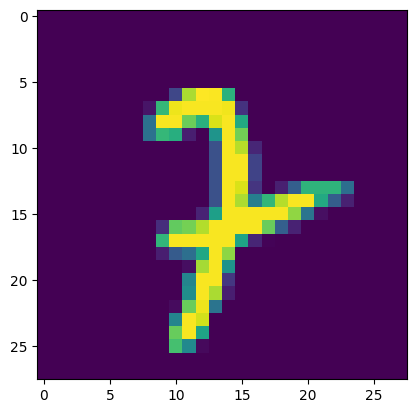

In [ ]:
i = 930
print(list(predictions[i]).index(max(predictions[0])))
plt.imshow(X_test[i])